<a href="https://colab.research.google.com/github/evcereti/Aprendiendo_ML_y_DS/blob/main/regresion_lineal_multiple_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresion Lineal Multiple con Scikit-Learn

##Importando las librerias necesarias

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Importando y analizando el conjunto de datos

In [19]:
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

En esta muestra, observamos que tenemos 5 columnas, la mayoría numéricas, una de ellas es Categórica (States) y la última (Profit) representa las ganancias, la variable que queremos predecir en la mayoría de los análisis de este tipo.


Un análisis de gráficos por pares nos muestra que en este caso que Profit crece linealmente con R&D Spend, mientras que la contribución lineal del resto de las variables es menos clara.

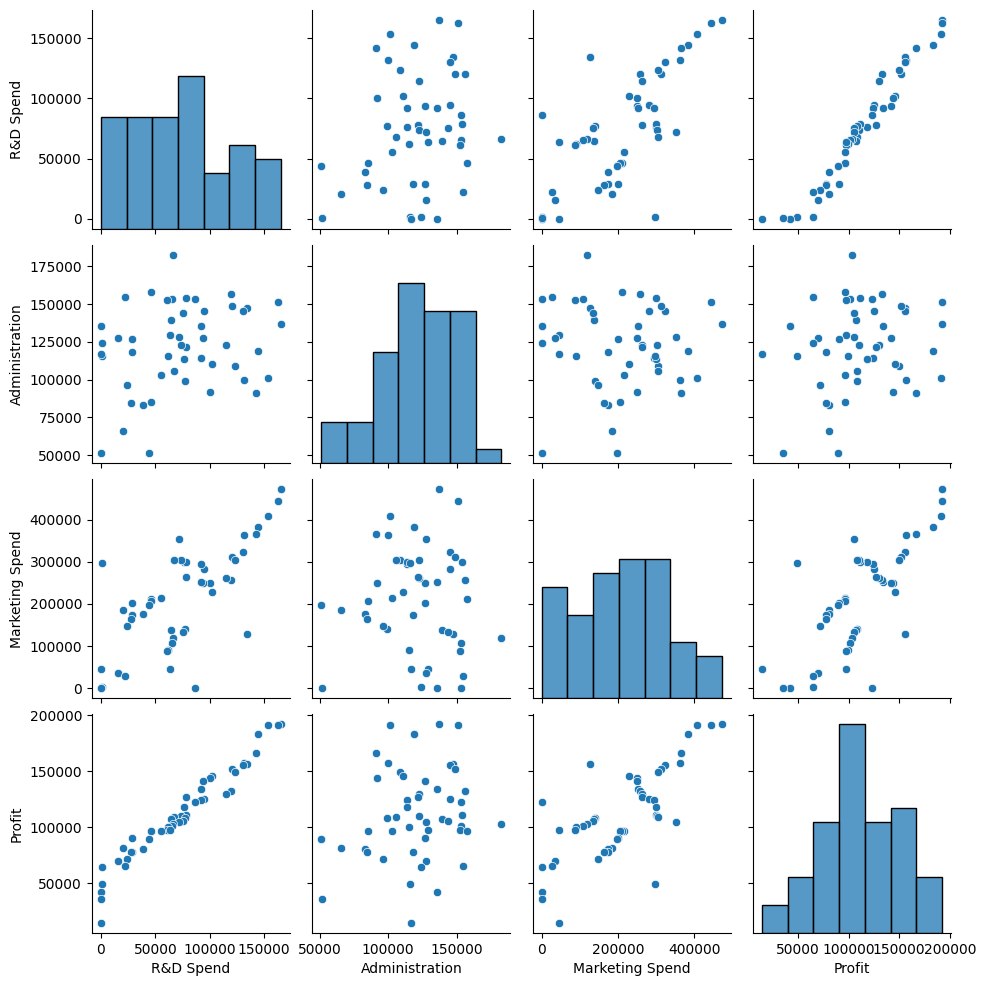

In [39]:
import seaborn as sns
sns.pairplot(dataset)

Para empezar a diseñar nuestro modelo, vamos a separar esta tabla en una matriz de características _X_ y su vector de etiquetas _y_

In [20]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [8]:
X.head()

R&D Spend  Administration  Marketing Spend       State
0  165349.20       136897.80        471784.10    New York
1  162597.70       151377.59        443898.53  California
2  153441.51       101145.55        407934.54     Florida
3  144372.41       118671.85        383199.62    New York
4  142107.34        91391.77        366168.42     Florida

In [26]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

Analizamos la columna de estados para saber con cuantas valores diferentes tenemos que tratar.

In [21]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

Tenemos 3 estados, así que podríamos suponer que requerimos 3 vectores para codificar la informacoón:

*   New York -> (0, 0, 1)
*   California -> (0, 1, 0)
*   Florida -> (1, 0, 0)

Sin embargo, estaríamos cayendo en la _dummy variable trap_, dado que un estado se puede deducir de los otros dos (Si no estamos en New York y no estamos en Florida entonces estamos en California). Tomando esto en cuenta, deberíamos usar la siguiente estrategia.

1.   New York -> (0, 1)
2.   California -> (1, 0)
3.   Florida -> (1, 1)

Nota: Scikit-learn nos provee del modulo One-Hot-Encoding que realiza automáticamente este paso.

In [22]:
dummy_states = pd.get_dummies(X['State'], drop_first=True)
X = X.drop('State', axis=1)
X = pd.concat([X, dummy_states], axis=1)


In [25]:
X.head()

R&D Spend  Administration  Marketing Spend  Florida  New York
0  165349.20       136897.80        471784.10    False      True
1  162597.70       151377.59        443898.53    False     False
2  153441.51       101145.55        407934.54     True     False
3  144372.41       118671.85        383199.62    False      True
4  142107.34        91391.77        366168.42     True     False

Nuestra aproximación lineal tendrá la siguiente ecuacion de 5 incógnitas

$y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 + b_4x_4 + b_5x_5$

donde $b_0,..., b_5$ son los coeficientes a aproximar, y

*   $b_0$: _bias_
*   $x_1$: RD Spend
*   $x_2$: Administration
*   $x_3$: Marketing Spend
*   $x_4$: Florida
*   $x_5$: New York



##Separando los datos en los subconjuntos de Entrenamiento y Tests

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Entrenando el modelo

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

##Realizando las predicciones

In [32]:
y_pred = regressor.predict(X_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

##Analizando la exactitud del modelo

Para analizar la validez de un modelo de regresión lineal podemos utilizar el test estadistico $R^2$. Si el test resulta en un número cercano a 1, podemos asumir que las predicciones realizadas serán las correctas dentro de su intervalo de validez.

Utlizando scikit-learn para esto

In [35]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score


0.9347068473282423

Observamos que el test $R^2$ resulta en 0.93, muy cercano a 1, y el modelo se asume correcto.